# WeatherPy
---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#create empty lists to store data
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date = []
record_counter = 0
set_counter = 1

#loop through cities list 
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url).json()
    weather_df = weather_response
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 1
    print(f"Processing Record {record_counter} of set {set_counter} | {city}")
    try:
        lat.append(weather_df["coord"]["lat"])
        lng.append(weather_df["coord"]["lon"])
        max_temp.append(weather_df["main"]["temp_max"])
        humidity.append(weather_df["main"]["humidity"])
        cloudiness.append(weather_df["clouds"]["all"])
        wind_spd.append(weather_df["wind"]["speed"])
        country.append(weather_df["sys"]["country"])
        date.append(weather_df["dt"])
        city_name.append(city)
    except (KeyError):
        print("City not found, skipping...")
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | ribeira grande
Processing Record 2 of set 1 | hobart
Processing Record 3 of set 1 | kapaa
Processing Record 4 of set 1 | punta arenas
Processing Record 5 of set 1 | jamestown
Processing Record 6 of set 1 | butaritari
Processing Record 7 of set 1 | bredasdorp
Processing Record 8 of set 1 | cassilandia
Processing Record 9 of set 1 | rikitea
Processing Record 10 of set 1 | pevek
Processing Record 11 of set 1 | marsa matruh
Processing Record 12 of set 1 | mataura
Processing Record 13 of set 1 | yenagoa
Processing Record 14 of set 1 | tutoia
Processing Record 15 of set 1 | lasa
Processing Record 16 of set 1 | barrow
Processing Record 17 of set 1 | barentsburg
City not found, skipping...
Processing Record 18 of set 1 | vaini
Processing Record 19 of set 1 | sorong
Processing Record 20 of set 1 | humberto de campos
Processing Record 21 of set 1 | newton
Processing Record 22 of set 1 | vardo
Processing Record 

Processing Record 42 of set 4 | mildura
Processing Record 43 of set 4 | avarua
Processing Record 44 of set 4 | mahebourg
Processing Record 45 of set 4 | sinnamary
Processing Record 46 of set 4 | namibe
Processing Record 47 of set 4 | flin flon
Processing Record 48 of set 4 | poum
Processing Record 49 of set 4 | luanda
Processing Record 50 of set 4 | cape town
Processing Record 1 of set 5 | tilichiki
Processing Record 2 of set 5 | pingliang
Processing Record 3 of set 5 | ahipara
Processing Record 4 of set 5 | sentyabrskiy
City not found, skipping...
Processing Record 5 of set 5 | inuvik
Processing Record 6 of set 5 | marzuq
Processing Record 7 of set 5 | hamilton
Processing Record 8 of set 5 | rondonopolis
Processing Record 9 of set 5 | mys shmidta
City not found, skipping...
Processing Record 10 of set 5 | mount isa
Processing Record 11 of set 5 | faya
Processing Record 12 of set 5 | quatre cocos
Processing Record 13 of set 5 | svetlaya
Processing Record 14 of set 5 | tateyama
Processi

Processing Record 29 of set 8 | benghazi
Processing Record 30 of set 8 | forestville
Processing Record 31 of set 8 | nenjiang
Processing Record 32 of set 8 | shimanovsk
Processing Record 33 of set 8 | horgos
Processing Record 34 of set 8 | tabiauea
City not found, skipping...
Processing Record 35 of set 8 | havelock
Processing Record 36 of set 8 | dourbali
Processing Record 37 of set 8 | knysna
Processing Record 38 of set 8 | nizhniy baskunchak
Processing Record 39 of set 8 | karpogory
Processing Record 40 of set 8 | malanje
Processing Record 41 of set 8 | semirom
Processing Record 42 of set 8 | denpasar
Processing Record 43 of set 8 | port moresby
Processing Record 44 of set 8 | mangrol
Processing Record 45 of set 8 | isangel
Processing Record 46 of set 8 | katsuura
Processing Record 47 of set 8 | rio gallegos
Processing Record 48 of set 8 | griffith
Processing Record 49 of set 8 | biak
Processing Record 50 of set 8 | kapenguria
Processing Record 1 of set 9 | besenyszog
Processing Rec

Processing Record 19 of set 12 | kinna
Processing Record 20 of set 12 | dukhovshchina
Processing Record 21 of set 12 | temaraia
City not found, skipping...
Processing Record 22 of set 12 | asyut
Processing Record 23 of set 12 | abancay
Processing Record 24 of set 12 | iwaki
Processing Record 25 of set 12 | constantine
Processing Record 26 of set 12 | anton lizardo
Processing Record 27 of set 12 | siavonga
Processing Record 28 of set 12 | keti bandar
Processing Record 29 of set 12 | ondorhaan
City not found, skipping...
Processing Record 30 of set 12 | borama
City not found, skipping...
Processing Record 31 of set 12 | nakamura
Processing Record 32 of set 12 | tselinnoye
Processing Record 33 of set 12 | karratha
Processing Record 34 of set 12 | yashalta
Processing Record 35 of set 12 | novyy urengoy
Processing Record 36 of set 12 | avera
Processing Record 37 of set 12 | kutum
Processing Record 38 of set 12 | cumra
Processing Record 39 of set 12 | porto santo
Processing Record 40 of set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_dict = {
    'City': city_name,
    'Lat':lat,
    'Long':lng,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_spd, 
    'Country':country,
    'Date':date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file, index=False)
weather_data.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,58.89,85,100,14.56,PT,1613098269
1,hobart,-42.8794,147.3294,73.00,40,40,17.27,AU,1613098025
2,kapaa,22.0752,-159.3190,75.20,57,1,6.91,US,1613098116
3,punta arenas,-53.1500,-70.9167,46.40,71,0,6.91,CL,1613098270
4,jamestown,42.0970,-79.2353,14.00,79,40,5.75,US,1613098270


In [41]:
weather_data.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.00000,557.000000,5.570000e+02
mean,20.025589,16.365641,49.206266,74.113106,57.00000,8.060467,1.613098e+09
std,33.130965,87.932260,31.802462,18.688562,40.26084,6.285484,8.342738e+01
min,-54.800000,-175.200000,-43.600000,14.000000,0.00000,0.160000,1.613098e+09
25%,-7.304400,-57.557500,28.830000,65.000000,11.00000,3.560000,1.613098e+09
50%,25.020900,23.433300,59.580000,78.000000,75.00000,6.670000,1.613098e+09
75%,47.300000,81.482500,74.210000,88.000000,97.00000,10.420000,1.613098e+09
max,78.218600,179.316700,94.840000,100.000000,100.00000,41.430000,1.613098e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
#  Using loc to determine if there are any cities with humidity > 100
weather_data.loc[weather_data["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


There were no cities found to have humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

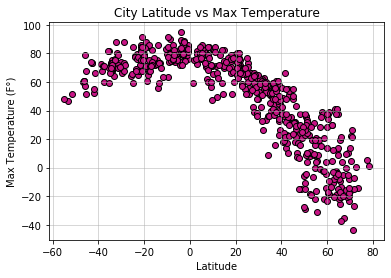

In [47]:
# Create Latitude vs Temperature scatter plot
x = weather_data["Lat"]
y = weather_data["Max Temp"]
plt.scatter(x, y, facecolor = "mediumvioletred", edgecolor = "black")
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output/City Latitude vs Max Temperature.png")

In this scatterplot, each city's max temperature is compared with their respective latitude. At latitude 0° we see that the max temperatures are within the range of 60° to almost 100° and as the latitude increases, the temperature decreases.

## Latitude vs. Humidity Plot

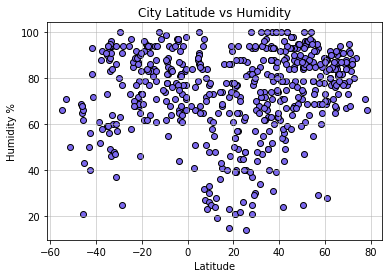

In [48]:
# Create Latitude vs Humidity scatter plot
x = weather_data["Lat"]
y = weather_data["Humidity"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output/City Latitude vs Humidity.png")

In this scatterplot there is no real relationship between each city's latitude and its humidity content.

## Latitude vs. Cloudiness Plot

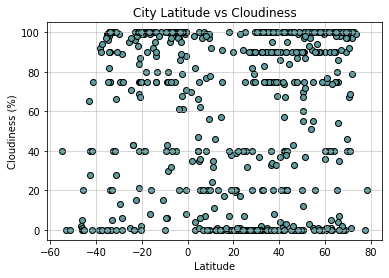

In [49]:
# Create Latitude vs Cloudiness scatter plot
x = weather_data["Lat"]
y = weather_data["Cloudiness"]
plt.scatter(x, y, facecolor = "cadetblue", edgecolor = "black")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output/City Latitude vs Cloudiness.png")

In this scatterplot, there is also no real relationship between latitude and cloudiness of a city. 

## Latitude vs. Wind Speed Plot

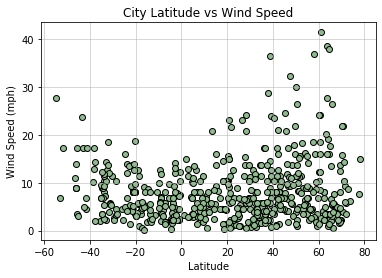

In [50]:
# Create Latitude vs Wind Speed scatter plot
x = weather_data["Lat"]
y = weather_data["Wind Speed"]
plt.scatter(x, y, facecolor = "darkseagreen", edgecolor = "black")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output/City Latitude vs Wind Speed.png")

In this scatter plot there is a concentration of data towards the bottom of the graph indicating that wind speeds rarely reach above 30 mph across the -60° to 80° latitude range.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7533711804567735


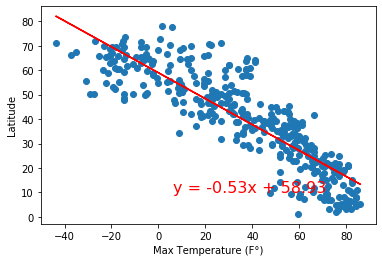

In [61]:
#finding northern hemisphere latitudes
northern_hem = weather_data.loc[weather_data["Lat"] >= 0]

x_values = northern_hem["Max Temp"]
y_values = northern_hem["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.ylabel('Latitude')
plt.xlabel('Max Temperature (F°)')
print(f"R squared: {rvalue**2}")
plt.savefig("output/Northern Hemisphere - Max Temp vs Latitude Linear Regression.png")
plt.show()

In this plot, there is a strong negative correlation between latitude and max temperature for cities in the northern hemisphere suggesting that as the latitude gets closer to 0° the max temperature increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.35442381140820156


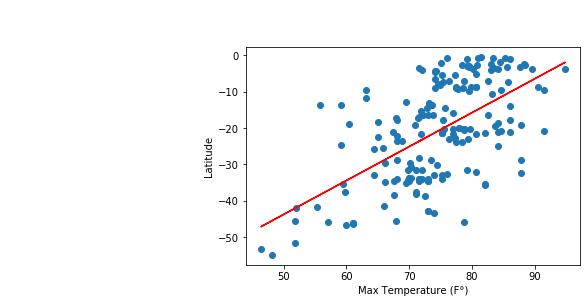

In [62]:
southern_hem = weather_data.loc[weather_data["Lat"] < 0]

x_values = southern_hem["Max Temp"]
y_values = southern_hem["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.ylabel('Latitude')
plt.xlabel('Max Temperature (F°)')
print(f"R squared: {rvalue**2}")
plt.savefig("output/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

In this plot, for cities in the Southern Hemisphere, there is a weak positive correlation between latitude and max temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.12868280930913922


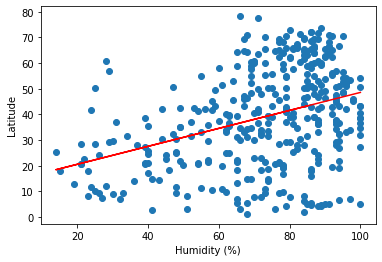

In [63]:
x_values = northern_hem["Humidity"]
y_values = northern_hem["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.ylabel('Latitude')
plt.xlabel('Humidity (%)')
print(f"R squared: {rvalue**2}")
plt.savefig("output/Northern Hemisphere - Latitude vs Humidity Linear Regression.png")
plt.show()

There is a very weak positive correlation between latitude and humidity in cities in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.07285070898717752


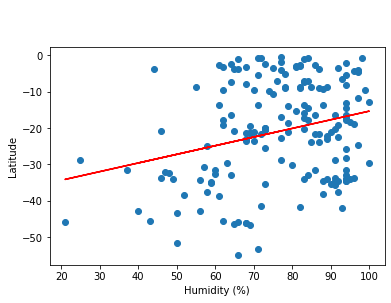

In [64]:
x_values = southern_hem["Humidity"]
y_values = southern_hem["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.ylabel('Latitude')
plt.xlabel('Humidity (%)')
print(f"R squared: {rvalue**2}")
plt.savefig("output/Southern Hemisphere - Latitude vs. Humidity Linear Regression.png")
plt.show()

There is no correlation between cities in the southern hemisphere when comparing latitude to humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0830173459910377


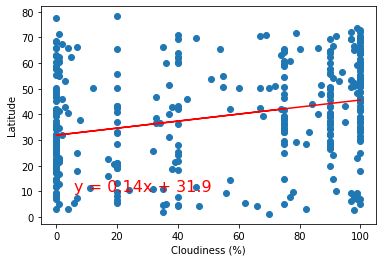

In [67]:
x_values = northern_hem["Cloudiness"]
y_values = northern_hem["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.ylabel('Latitude')
plt.xlabel('Cloudiness (%)')
print(f"R squared: {rvalue**2}")
plt.savefig("output/Northern Hemisphere - Latitude vs Cloudiness Linear Regression.png")
plt.show()

There is no correlation between cloudiness and latitude in the nothern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.14744188428427857


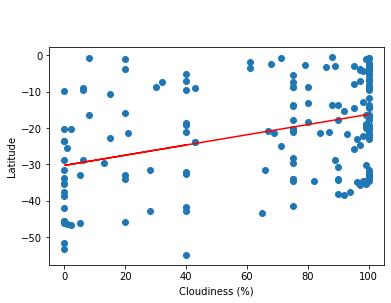

In [66]:
x_values = southern_hem["Cloudiness"]
y_values = southern_hem["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.ylabel('Latitude')
plt.xlabel('Cloudiness (%)')
print(f"R squared: {rvalue**2}")
plt.savefig("output/Southern Hemisphere - Latitude vs. Cloudiness Linear Regression.png")
plt.show()

There is a very weak positive to almost no correlation for cities in the southern hemisphere when comparing cloudiness and latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.02482850321503779


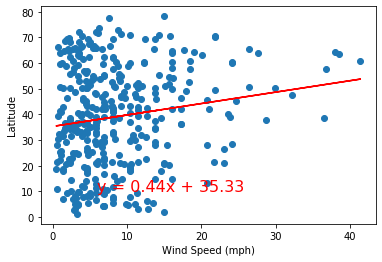

In [68]:
x_values = northern_hem["Wind Speed"]
y_values = northern_hem["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.ylabel('Latitude')
plt.xlabel('Wind Speed (mph)')
print(f"R squared: {rvalue**2}")
plt.savefig("output/Northern Hemisphere - Latitude vs Wind Speed Linear Regression.png")
plt.show()

There is no correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.1447293307983626


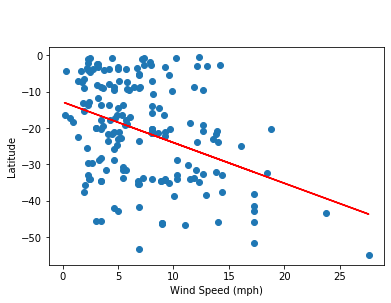

In [69]:
x_values = southern_hem["Wind Speed"]
y_values = southern_hem["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.ylabel('Latitude')
plt.xlabel('Wind Speed (mph)')
print(f"R squared: {rvalue**2}")
plt.savefig("output/Southern Hemisphere - Latitude vs. Wind Speed Linear Regression.png")
plt.show()

There is a very weak negative to almost no correlation between wind speed and latitude for the southern hemisphere cities.